## Import de todas as bibliotecas

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Import do banco de dados

In [76]:
nyt = pd.read_csv('nyt_ftpg_1996_2006.csv', encoding='ISO-8859-1')
nyt.info()
nyt.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31034 entries, 0 to 31033
Data columns (total 18 columns):
Article_ID                31034 non-null int64
Date                      31034 non-null object
Article_Sequence          31034 non-null object
Title                     31034 non-null object
Summary                   31034 non-null object
Topic_6digit              31034 non-null int64
Topic_4digit              31034 non-null int64
Topic_2digit              31034 non-null int64
War on Terror             31034 non-null int64
Katrina                   31034 non-null int64
Israel/Palestine          31034 non-null int64
Immigration               31034 non-null int64
Presidential Elections    31034 non-null int64
Clinton Impeachment       31034 non-null int64
Enron                     31034 non-null int64
Darfur                    31034 non-null int64
Race/Ethnicity            31034 non-null int64
Schiavo                   31034 non-null int64
dtypes: int64(14), object(4)
memory usage

,Article_ID,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
count,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000
mean,15517.500000,164152.898660,1641.543855,16.279532,0.136205,0.005478,0.034253,0.012341,0.052459,0.014307,0.005993,0.000838,0.014951,0.000741
std,8958.888463,96256.828146,962.523270,9.661223,0.343012,0.073811,0.181881,0.110406,0.222954,0.118755,0.077186,0.028933,0.121360,0.027214
min,1.000000,10000.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7759.250000,120800.000000,1208.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15517.500000,170600.000000,1706.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23275.750000,201000.000000,2010.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31034.000000,990000.000000,9900.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000





### Pré-tratamento

In [3]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [4]:
def countWord(title):
    return len(title.split())


In [5]:
def reverse_index(dataset):
    dataset = dataset.reindex(index=dataset.index[::-1])
    dataset = dataset.reset_index()
    dataset = dataset.drop('index',1)
    return dataset

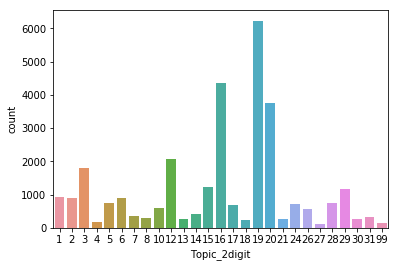

In [74]:
sns.countplot(data=nyt, x='Topic_2digit')

In [77]:
nyt.drop_duplicates('Title',keep='first',inplace=True)

In [78]:
nyt['CountWord']=nyt['Title'].apply(countWord)

In [79]:
nyt[nyt['CountWord'] > wordcount]['Topic_2digit'].value_counts()

19    5422
16    3850
20    3094
12    1881
3     1664
15    1065
6      819
2      817
1      780
29     766
5      675
24     617
17     611
28     586
10     515
26     409
14     363
7      325
31     274
8      272
13     241
21     231
18     221
30     207
4      154
99     106
27     106
Name: Topic_2digit, dtype: int64

In [8]:
def megafunction(df, coef, cut, wordcount):
    aux0 = nyt[nyt['CountWord'] > wordcount]
    aux1 = aux0[aux0['Topic_2digit'] == coef]
    aux2 = aux1.sample(cut, replace=False)
    aux3 = aux2[['Title', 'Topic_2digit']]
    aux3 = reverse_index(aux3)
    for i in range(cut):
        df.loc[len(df)] = [aux3['Title'][i], aux3['Topic_2digit'][i]]


In [9]:
def cutfunction_hierarchy(df, coef, cut, wordcount,col):
    aux0 = nyt[nyt['CountWord'] > wordcount]
    aux1 = aux0[aux0[col] == coef]
    aux2 = aux1.sample(cut, replace=False)
    aux3 = aux2[['Title', 'Topic_2digit', col]]
    aux3 = reverse_index(aux3)
    for i in range(cut):
           df.loc[len(df)] = [aux3['Title'][i], aux3['Topic_2digit'][i],aux3[col][i]]

In [53]:
##nyt_processed = pd.DataFrame(columns=['Title', 'Topic_2digit'])
##cut = 100
##wordcount
##for index in range(1,9):
##    megafunction(nyt_processed,index,cut,wordcount)
##megafunction(nyt_processed,10,cut,wordcount)
##for index in range(12,22):
##    megafunction(nyt_processed,index,cut,wordcount)
##megafunction(nyt_processed,24,cut,wordcount)
##for index in range(26,32):
##    megafunction(nyt_processed,index,cut,wordcount)
##megafunction(nyt_processed,99,cut,wordcount)

In [38]:
def hierarchicalH1(code):
    if code == 19:
        return code
    else:
        return 44



In [119]:
def hierarchicalH2(code):
    if code == 16:
        return code
    else:
        return 44


In [129]:
def hierarchicalH3(code):
    if code == 20:
        return code
    else:
        return 44


In [130]:
def hierarchicalH4(code):
    if code == 12:
        return code
    else:
        return 44


In [155]:
def hierarchicalH5(code):
    if code == 15:
        return code
    else:
        return 44


In [156]:
def hierarchicalH6(code):
    if code == 1:
        return code
    else:
        return 44

In [80]:
nyt['H1'] = nyt['Topic_2digit'].apply(hierarchicalH1)

In [81]:
nyt.head(2)

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo,CountWord,H1
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0,10,44
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0,7,44


In [82]:
nyt_processed = pd.DataFrame(columns=['Title', 'Topic_2digit', 'H1'])
cut = 5000
wordcount= 5
col = 'H1'
cutfunction_hierarchy(nyt_processed,19,cut,wordcount,col)
##cutfunction_hierarchy(nyt_processed,16,cut,wordcount,col)
cut = 
cutfunction_hierarchy(nyt_processed,44,cut,wordcount,col)
nyt_processed[col] = nyt_processed[col].astype(int)


In [83]:
nyt_processed['Topic_2digit'].value_counts()


19    5000
16    1867
20    1566
12     908
3      808
15     477
6      399
2      380
1      379
29     369
5      325
17     292
28     289
24     274
10     252
26     187
14     171
7      151
8      138
13     134
31     131
21     113
18     113
30     100
4       74
27      53
99      50
Name: Topic_2digit, dtype: int64

In [108]:
nyt_processed = nyt[['Title', 'Topic_2digit', 'H1']]


In [110]:
nyt_processed.describe()

,Topic_2digit,H1
count,30336.000000,30336.000000
mean,16.183940,38.866660
std,9.588421,10.098796
min,1.000000,19.000000
25%,12.000000,44.000000
50%,17.000000,44.000000
75%,20.000000,44.000000
max,99.000000,44.000000


## Classificador Naive Bayes

In [14]:
def naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test):
    pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
        ])
    pipeline.fit(nyt_train, topic_train)
    predictions = pipeline.predict(nyt_test)
    print(classification_report(topic_test,predictions))


## Classificador Random Forest

In [15]:
def random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test):
    pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])
    pipeline.fit(nyt_train, topic_train)
    predictions = pipeline.predict(nyt_test)
    print(classification_report(topic_test,predictions))

## Execução dos classificadores

In [111]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed['Title'], nyt_processed[col], test_size=0.3)

#### Execução NB:

In [112]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         19       0.97      0.21      0.34      1897
         44       0.83      1.00      0.90      7204

avg / total       0.86      0.83      0.79      9101



#### Execução RF:

In [113]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         19       0.75      0.62      0.68      1897
         44       0.91      0.95      0.93      7204

avg / total       0.87      0.88      0.87      9101



### Classificador Lv 2: topico 16

In [120]:
nyt['H2'] = nyt['Topic_2digit'].apply(hierarchicalH2)

In [121]:
aux = nyt[nyt['Topic_2digit'] != 19]

In [124]:
nyt_processed2 = aux[['Title', 'Topic_2digit', 'H2']]

In [125]:
nyt_processed2.describe()

,Topic_2digit,H2
count,24107.000000,24107.000000
mean,15.456299,38.938234
std,10.635598,10.775565
min,1.000000,16.000000
25%,8.000000,44.000000
50%,16.000000,44.000000
75%,20.000000,44.000000
max,99.000000,44.000000


In [126]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed2['Title'], nyt_processed2['H2'], test_size=0.3)

In [127]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         16       0.98      0.43      0.60      1318
         44       0.89      1.00      0.94      5915

avg / total       0.90      0.89      0.88      7233



In [128]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         16       0.84      0.76      0.80      1318
         44       0.95      0.97      0.96      5915

avg / total       0.93      0.93      0.93      7233



### Classificador Lv 3: topico 20

In [137]:
nyt['H3'] = nyt['Topic_2digit'].apply(hierarchicalH3)
aux = nyt[(nyt['Topic_2digit'] != 19) & (nyt['Topic_2digit'] != 16)]
nyt_processed3 = aux[['Title', 'Topic_2digit', 'H3']]
nyt_processed3.describe()

,Topic_2digit,H3
count,19749.000000,19749.000000
mean,15.336321,39.418502
std,11.747289,9.432409
min,1.000000,20.000000
25%,6.000000,44.000000
50%,15.000000,44.000000
75%,20.000000,44.000000
max,99.000000,44.000000


In [138]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed3['Title'], nyt_processed3['H3'], test_size=0.3)

In [139]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         20       0.97      0.33      0.49      1138
         44       0.86      1.00      0.92      4787

avg / total       0.88      0.87      0.84      5925



In [140]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         20       0.62      0.75      0.68      1138
         44       0.94      0.89      0.91      4787

avg / total       0.88      0.86      0.87      5925



### Classificador Lv 4: topico 12

In [157]:
nyt['H4'] = nyt['Topic_2digit'].apply(hierarchicalH4)
aux = nyt[(nyt['Topic_2digit'] != 19) & (nyt['Topic_2digit'] != 16) & (nyt['Topic_2digit'] != 20)]
nyt_processed4 = aux[['Title', 'Topic_2digit', 'H4']]
nyt_processed4.describe()

,Topic_2digit,H4
count,15979.000000,15979.000000
mean,14.235997,39.846549
std,12.814713,10.754837
min,1.000000,12.000000
25%,5.000000,44.000000
50%,12.000000,44.000000
75%,24.000000,44.000000
max,99.000000,44.000000


In [158]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed4['Title'], nyt_processed4['H4'], test_size=0.3)

In [159]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         12       0.97      0.05      0.10       589
         44       0.88      1.00      0.94      4205

avg / total       0.89      0.88      0.83      4794



In [160]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         12       0.70      0.50      0.59       589
         44       0.93      0.97      0.95      4205

avg / total       0.90      0.91      0.91      4794



### Classificador Lv 5: topico 15

In [161]:
nyt['H5'] = nyt['Topic_2digit'].apply(hierarchicalH5)
aux = nyt[(nyt['Topic_2digit'] != 19) & (nyt['Topic_2digit'] != 16) & (nyt['Topic_2digit'] != 20) & (nyt['Topic_2digit'] != 12)]
nyt_processed5 = aux[['Title', 'Topic_2digit', 'H5']]
nyt_processed5.describe()

,Topic_2digit,H5
count,13905.000000,13905.000000
mean,14.569507,41.453506
std,13.706034,8.207834
min,1.000000,15.000000
25%,3.000000,44.000000
50%,13.000000,44.000000
75%,24.000000,44.000000
max,99.000000,44.000000


In [162]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed5['Title'], nyt_processed5['H5'], test_size=0.3)

In [163]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         15       1.00      0.02      0.03       351
         44       0.92      1.00      0.96      3821

avg / total       0.92      0.92      0.88      4172



In [164]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

         15       0.63      0.25      0.36       351
         44       0.93      0.99      0.96      3821

avg / total       0.91      0.92      0.91      4172



### Classificador Lv 6: topico 1

In [165]:
nyt['H6'] = nyt['Topic_2digit'].apply(hierarchicalH6)
aux = nyt[(nyt['Topic_2digit'] != 19) & (nyt['Topic_2digit'] != 16) & (nyt['Topic_2digit'] != 20) & (nyt['Topic_2digit'] != 12) & (nyt['Topic_2digit'] != 15)]
nyt_processed6 = aux[['Title', 'Topic_2digit', 'H6']]
nyt_processed6.describe()

,Topic_2digit,H6
count,12684.000000,12684.000000
mean,14.528067,40.799748
std,14.349939,11.286243
min,1.000000,1.000000
25%,3.000000,44.000000
50%,10.000000,44.000000
75%,26.000000,44.000000
max,99.000000,44.000000


In [166]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed6['Title'], nyt_processed6['H6'], test_size=0.3)

In [167]:
naive_bayes_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

          1       1.00      0.08      0.14       264
         44       0.94      1.00      0.97      3542

avg / total       0.94      0.94      0.91      3806



In [168]:
random_forest_classifier(nyt_train, topic_train, nyt_test, topic_test)

             precision    recall  f1-score   support

          1       0.70      0.59      0.64       264
         44       0.97      0.98      0.98      3542

avg / total       0.95      0.95      0.95      3806



In [169]:
reddit_news = pd.read_csv("Combined_News_DJIA.csv")

In [176]:
reddit_news.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [177]:
reddit_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [173]:
dowJones = pd.read_csv("DJIA_table.csv")

In [174]:
dowJones.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [178]:
dowJones = reverse_index(dowJones)

In [179]:
dowJones['var'] = (dowJones['Close'] / dowJones['Open']) -1


In [180]:
dowJones.head()

,Date,Open,High,Low,Close,Volume,Adj Close,var
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.026437
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004491
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.011818
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.008583
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.007272


In [182]:
reddit_news['var'] = dowJones['var']

In [275]:
pipelineRFH1 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [276]:
pipelineRFH2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [277]:
pipelineRFH3 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [278]:
pipelineRFH4 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [279]:
pipelineRFH5 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [280]:
pipelineRFH6 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
        ])

In [292]:
nyt_processed4.head()

,Title,Topic_2digit,H4
0,Nation's Smaller Jails Struggle To Cope With S...,12,12
1,Dancing (and Kissing) In the New Year,28,44
5,"A U.S. Agency, Once Powerful, Is Dead at 108",10,44
6,"For More and More Job Seekers, An Aging Parent...",5,44
7,A Toll Road in California Offers A High-Tech A...,10,44


In [293]:
pipelineRFH1.fit(nyt_processed['Title'],nyt_processed['H1'])
pipelineRFH2.fit(nyt_processed2['Title'],nyt_processed2['H2'])
pipelineRFH3.fit(nyt_processed3['Title'],nyt_processed3['H3'])
pipelineRFH4.fit(nyt_processed4['Title'],nyt_processed4['H4'])
pipelineRFH5.fit(nyt_processed5['Title'],nyt_processed5['H5'])
pipelineRFH6.fit(nyt_processed6['Title'],nyt_processed6['H6'])


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000D44A158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [295]:
def top_classifier(top, top_name):
    
    predictions = pipelineRFH1.predict(reddit_news[top])
        
    predictions2 = pipelineRFH2.predict(reddit_news[(predictions != 19)][top])
    
    count = 0
    for index in range(0, predictions.size):
        if predictions[index] == 44:
            predictions[index] = predictions2[count]
            count=count+1
        
    predictions3 = pipelineRFH3.predict(reddit_news[(predictions != 19) & (predictions != 16)][top])
    
    count = 0
    for index in range(0, predictions.size):
        if predictions[index] == 44:
            predictions[index] = predictions3[count]
            count=count+1
    
    predictions4 = pipelineRFH4.predict(reddit_news[(predictions != 19) & (predictions != 16) & (predictions != 20)][top])
    
    count = 0
    for index in range(0, predictions.size):
        if predictions[index] == 44:
            predictions[index] = predictions4[count]
            count=count+1
    
    predictions5 = pipelineRFH5.predict(reddit_news[(predictions != 19) & (predictions != 16) & (predictions != 20) & (predictions != 12)][top])
    
    count = 0
    for index in range(0, predictions.size):
        if predictions[index] == 44:
            predictions[index] = predictions5[count]
            count=count+1
    
    predictions6 = pipelineRFH6.predict(reddit_news[(predictions != 19) & (predictions != 16) & (predictions != 20) & (predictions != 12) & (predictions != 15)][top])
    
    count = 0
    for index in range(0, predictions.size):
        if predictions[index] == 44:
            predictions[index] = predictions6[count]
            count=count+1
    
    reddit_news[top_name] = predictions
    
    
    
    

In [296]:
top_classifier('Top1', 'Topic_Top1')

In [299]:
reddit_news['Topic_Top1'].value_counts()

19    858
44    510
20    436
16    128
12     33
15     15
1       9
Name: Topic_Top1, dtype: int64

In [301]:
top_classifier('Top2', 'Topic_Top2')




In [303]:
reddit_news.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Topic_Top13,Topic_Top14,Topic_Top15,Topic_Top16,Topic_Top17,Topic_Top18,Topic_Top19,Topic_Top20,Topic_Top21,Topic_Top22
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,44,20,16,19,44,19,19,19,19,44


In [323]:
reddit_news.to_csv("complete_data", encoding='utf-8', index=False)

In [324]:
cd = pd.read_csv("complete_data")

In [325]:
cd.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Topic_Top13,Topic_Top14,Topic_Top15,Topic_Top16,Topic_Top17,Topic_Top18,Topic_Top19,Topic_Top20,Topic_Top21,Topic_Top22
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,44,20,16,19,44,19,19,19,19,44
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,44,19,44,44,19,19,44,44,44,19
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,19,19,20,20,19,44,16,20,19,20
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,19,19,19,20,19,44,20,19,44,19
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,20,19,20,44,19,44,44,19,44,20


In [2]:
complete_table = pd.read_csv('complete_data')



In [3]:
complete_table.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Topic_Top13,Topic_Top14,Topic_Top15,Topic_Top16,Topic_Top17,Topic_Top18,Topic_Top19,Topic_Top20,Topic_Top21,Topic_Top22
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,44,20,16,19,44,19,19,19,19,44
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,44,19,44,44,19,19,44,44,44,19
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,19,19,20,20,19,44,16,20,19,20
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,19,19,19,20,19,44,20,19,44,19
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,20,19,20,44,19,44,44,19,44,20


In [16]:
complete_table['Topic_Top12'].value_counts()

19    991
44    399
20    381
16    165
12     31
15     13
1       9
Name: Topic_Top12, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression


In [25]:
topic_train,topic_test,label_train,label_test = train_test_split(complete_table['Topic_Top1'], complete_table['Label'], test_size=0.3)

In [26]:
topic_train

95      44
1907    19
48      44
142     20
1219    44
997     16
1435    19
1534    19
1212    44
229     44
910     20
768     20
285     44
1384    19
859     19
1772    20
81      20
746     19
203     19
84      20
1003    44
198     19
273     20
1516    44
1227    44
1066    20
1485    44
990     20
1128    20
1145    44
        ..
461     44
744     44
1914    19
1124    20
834     20
468     20
925     19
1319    19
1697    44
1924    44
456     19
1267    19
1308    44
395     12
1451    20
1429    44
762     19
603     19
1622    19
1616    19
551     44
1904    20
1266    44
155     44
1837    19
157     20
1322    19
159     19
388     19
1832    19
Name: Topic_Top1, Length: 1392, dtype: int64

In [28]:
label_train.info

AttributeError: 'Series' object has no attribute 'info'

In [31]:
logmodel = LogisticRegression()
topic_train.reshape(-1,1)
label_train.reshape(-1,1)

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0],
       [0],
       [1],
       ..., 
       [0],
       [1],
       [1]], dtype=int64)

In [36]:
logmodel.fit(X=topic_train.reshape(-1,1), y=label_train)

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predictions = logmodel.predict(topic_test.reshape(-1,1))
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       281
          1       0.53      1.00      0.69       316

avg / total       0.28      0.53      0.37       597



C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
